In [1]:
# Importing the libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from pandas import Series
from numpy import log

In [2]:
df  = pd.read_csv('datasets_302666_618181_AAPL.csv')
df.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume
0,8/15/2018,209.220001,210.740005,208.330002,210.240005,207.027420,28807600
1,8/16/2018,211.750000,213.809998,211.470001,213.320007,210.060333,28500400
2,8/17/2018,213.440002,217.949997,213.160004,217.580002,214.255234,35427000
3,8/20/2018,218.100006,219.179993,215.110001,215.460007,212.167633,30287700
4,8/21/2018,216.800003,217.190002,214.029999,215.039993,211.754028,26159800
5,8/22/2018,214.100006,216.360001,213.839996,215.050003,211.763901,19018100
6,8/23/2018,214.649994,217.050003,214.600006,215.490005,212.197189,18883200
7,8/24/2018,216.600006,216.899994,215.110001,216.160004,212.856949,18476400
8,8/27/2018,217.149994,218.740005,216.330002,217.940002,214.609741,20525100
9,8/28/2018,219.009995,220.539993,218.919998,219.699997,216.342850,22776800


In [3]:
from pandas.tseries.offsets import BDay

In [4]:
df.shape

(251, 7)

In [5]:
df_date = df[['Date','Volume']]

In [6]:
df_date.tail()

,Date,Volume
246,8/8/2019,27009500
247,8/9/2019,24619700
248,8/12/2019,22474900
249,8/13/2019,47218500
250,8/14/2019,36453100


In [7]:
date1 = pd.date_range(start='8/15/2018', end='8/14/2019', freq=BDay())

In [8]:
date1

DatetimeIndex(['2018-08-15', '2018-08-16', '2018-08-17', '2018-08-20',
               '2018-08-21', '2018-08-22', '2018-08-23', '2018-08-24',
               '2018-08-27', '2018-08-28',
               ...
               '2019-08-01', '2019-08-02', '2019-08-05', '2019-08-06',
               '2019-08-07', '2019-08-08', '2019-08-09', '2019-08-12',
               '2019-08-13', '2019-08-14'],
              dtype='datetime64[ns]', length=261, freq='B')

In [9]:
len(date1)

261

In [10]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
us_bd

<CustomBusinessDay>

In [11]:
date2 = pd.date_range(start='8/15/2018', end='8/14/2019', freq=us_bd)

In [12]:
date2

DatetimeIndex(['2018-08-15', '2018-08-16', '2018-08-17', '2018-08-20',
               '2018-08-21', '2018-08-22', '2018-08-23', '2018-08-24',
               '2018-08-27', '2018-08-28',
               ...
               '2019-08-01', '2019-08-02', '2019-08-05', '2019-08-06',
               '2019-08-07', '2019-08-08', '2019-08-09', '2019-08-12',
               '2019-08-13', '2019-08-14'],
              dtype='datetime64[ns]', length=251, freq='C')

In [13]:
len(date2)

251

In [14]:
df_date['Time_Stamp'] = pd.DataFrame(date2, columns=['Date'])
df_date['Open'] = pd.DataFrame(df, columns=['Open'])

In [15]:
df_date

,Date,Volume,Time_Stamp,Open
0,8/15/2018,28807600,2018-08-15,209.220001
1,8/16/2018,28500400,2018-08-16,211.750000
2,8/17/2018,35427000,2018-08-17,213.440002
3,8/20/2018,30287700,2018-08-20,218.100006
4,8/21/2018,26159800,2018-08-21,216.800003
...,...,...,...,...
246,8/8/2019,27009500,2019-08-08,200.199997
247,8/9/2019,24619700,2019-08-09,201.300003
248,8/12/2019,22474900,2019-08-12,199.619995
249,8/13/2019,47218500,2019-08-13,201.020004


In [16]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        251 non-null    object        
 1   Volume      251 non-null    int64         
 2   Time_Stamp  251 non-null    datetime64[ns]
 3   Open        251 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 8.0+ KB


In [17]:
df_date.isnull().sum()

Date          0
Volume        0
Time_Stamp    0
Open          0
dtype: int64

In [18]:
# Durbin Watson Test
import statsmodels.api as sm
sm.stats.durbin_watson(df_date['Volume'])

0.13804147049471416

In [19]:
sm.stats.durbin_watson(df_date['Open'])

0.0003174209031518406

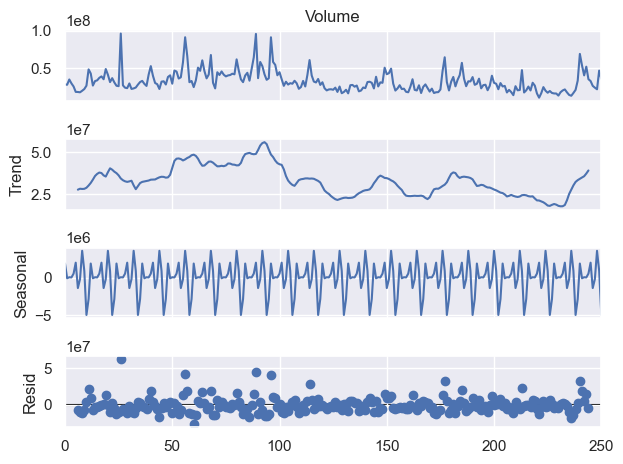

In [20]:
# Decomposition method
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Volume'], period=12)
decomposition.plot()
plt.show()

In [21]:
df_date['Date'] = pd.to_datetime(df_date['Date'])

In [22]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        251 non-null    datetime64[ns]
 1   Volume      251 non-null    int64         
 2   Time_Stamp  251 non-null    datetime64[ns]
 3   Open        251 non-null    float64       
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 8.0 KB


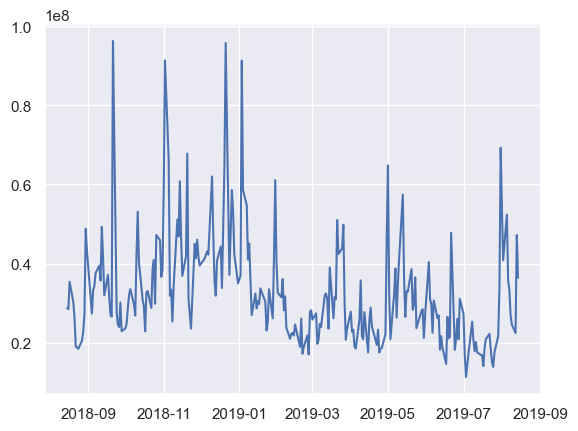

In [23]:
plt.plot(df_date['Date'], df_date['Volume'])
plt.show()

In [24]:
df_date['Volume'].describe()

count    2.510000e+02
mean     3.289967e+07
std      1.385336e+07
min      1.136200e+07
25%      2.329740e+07
50%      2.985580e+07
75%      3.927970e+07
max      9.624670e+07
Name: Volume, dtype: float64

In [26]:
# another method of importing dataset
df_final = pd.read_csv('datasets_302666_618181_AAPL.csv', parse_dates=True, index_col=0)
df_final.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-15,209.220001,210.740005,208.330002,210.240005,207.027420,28807600
2018-08-16,211.750000,213.809998,211.470001,213.320007,210.060333,28500400
2018-08-17,213.440002,217.949997,213.160004,217.580002,214.255234,35427000
2018-08-20,218.100006,219.179993,215.110001,215.460007,212.167633,30287700
2018-08-21,216.800003,217.190002,214.029999,215.039993,211.754028,26159800


In [28]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-08-15 to 2019-08-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [27]:
df_final.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

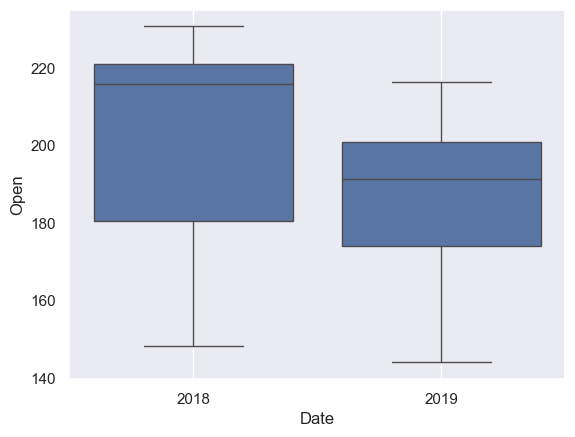

In [29]:
sns.boxplot(x=df_final.index.year, y=df_final['Open'])
plt.grid()

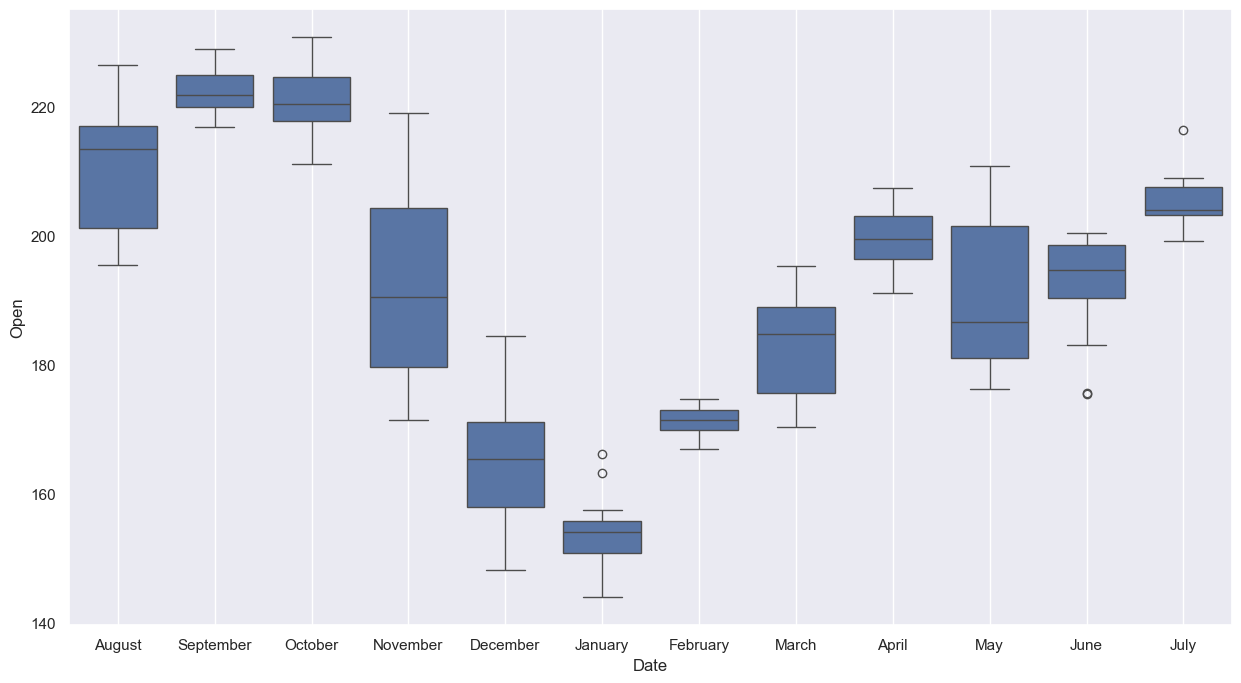

In [31]:
from pylab import rcParams
rcParams['figure.figsize']=15,8
sns.boxplot(x=df_final.index.month_name(), y=df_final['Open'])
plt.grid()

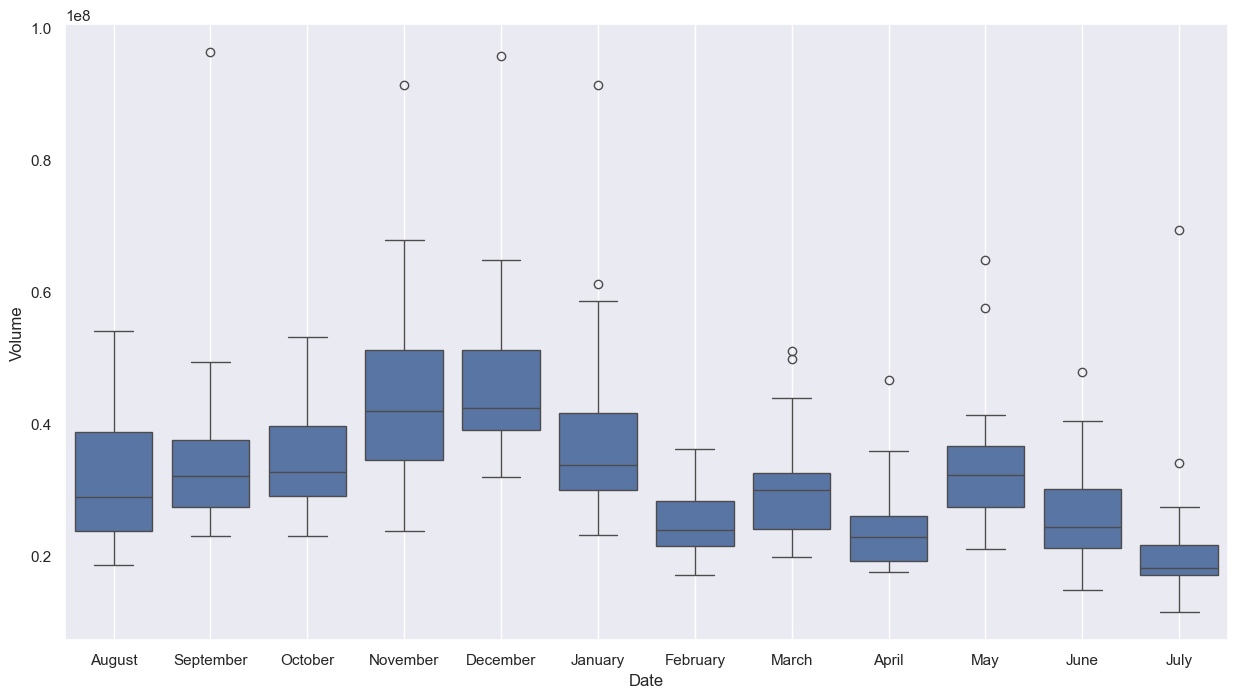

In [32]:
from pylab import rcParams
rcParams['figure.figsize']=15,8
sns.boxplot(x=df_final.index.month_name(), y=df_final['Volume'])
plt.grid()

In [33]:
df_final['Month'] = df_final.index.month
df_final['year'] = df_final.index.year

In [34]:
df_final

,Open,High,Low,Close,Adj Close,Volume,Month,year
Date,,,,,,,,
2018-08-15,209.220001,210.740005,208.330002,210.240005,207.027420,28807600,8,2018
2018-08-16,211.750000,213.809998,211.470001,213.320007,210.060333,28500400,8,2018
2018-08-17,213.440002,217.949997,213.160004,217.580002,214.255234,35427000,8,2018
2018-08-20,218.100006,219.179993,215.110001,215.460007,212.167633,30287700,8,2018
2018-08-21,216.800003,217.190002,214.029999,215.039993,211.754028,26159800,8,2018
...,...,...,...,...,...,...,...,...
2019-08-08,200.199997,203.529999,199.389999,203.429993,202.659988,27009500,8,2019
2019-08-09,201.300003,202.759995,199.289993,200.990005,200.990005,24619700,8,2019
2019-08-12,199.619995,202.050003,199.149994,200.479996,200.479996,22474900,8,2019


In [35]:
df['Time_Stamp'] = pd.to_datetime(df['Date'])
df_final_model = df.set_index('Time_Stamp')
df_final_model

,Date,Open,High,Low,Close,Adj Close,Volume
Time_Stamp,,,,,,,
2018-08-15,8/15/2018,209.220001,210.740005,208.330002,210.240005,207.027420,28807600
2018-08-16,8/16/2018,211.750000,213.809998,211.470001,213.320007,210.060333,28500400
2018-08-17,8/17/2018,213.440002,217.949997,213.160004,217.580002,214.255234,35427000
2018-08-20,8/20/2018,218.100006,219.179993,215.110001,215.460007,212.167633,30287700
2018-08-21,8/21/2018,216.800003,217.190002,214.029999,215.039993,211.754028,26159800
...,...,...,...,...,...,...,...
2019-08-08,8/8/2019,200.199997,203.529999,199.389999,203.429993,202.659988,27009500
2019-08-09,8/9/2019,201.300003,202.759995,199.289993,200.990005,200.990005,24619700
2019-08-12,8/12/2019,199.619995,202.050003,199.149994,200.479996,200.479996,22474900


In [36]:
df_final_model['Date'] = pd.to_datetime(df_final_model['Date'])
df_final_model.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-08-15 to 2019-08-14
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       251 non-null    datetime64[ns]
 1   Open       251 non-null    float64       
 2   High       251 non-null    float64       
 3   Low        251 non-null    float64       
 4   Close      251 non-null    float64       
 5   Adj Close  251 non-null    float64       
 6   Volume     251 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 15.7 KB


In [37]:
df_final_model.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Time_Stamp,,,,,,,
2018-08-15,2018-08-15,209.220001,210.740005,208.330002,210.240005,207.027420,28807600
2018-08-16,2018-08-16,211.750000,213.809998,211.470001,213.320007,210.060333,28500400
2018-08-17,2018-08-17,213.440002,217.949997,213.160004,217.580002,214.255234,35427000
2018-08-20,2018-08-20,218.100006,219.179993,215.110001,215.460007,212.167633,30287700
2018-08-21,2018-08-21,216.800003,217.190002,214.029999,215.039993,211.754028,26159800


In [38]:
df_final_model.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
Time_Stamp,,,,,,,
2019-08-08,2019-08-08,200.199997,203.529999,199.389999,203.429993,202.659988,27009500
2019-08-09,2019-08-09,201.300003,202.759995,199.289993,200.990005,200.990005,24619700
2019-08-12,2019-08-12,199.619995,202.050003,199.149994,200.479996,200.479996,22474900
2019-08-13,2019-08-13,201.020004,212.139999,200.479996,208.970001,208.970001,47218500
2019-08-14,2019-08-14,203.160004,206.440002,202.589996,202.750000,202.750000,36453100


In [39]:
len(df_final_model)

251

In [40]:
251*.80

200.8

In [41]:
train = df_final_model[pd.to_datetime(df_final_model['Date'])< pd.to_datetime('2019-06-05')]
train.shape

(201, 7)

In [44]:
test=df_final_model[pd.to_datetime(df_final_model['Date']) >= pd.to_datetime('2019-06-05')]
test.shape

(50, 7)

In [45]:
train_final=train[['Volume']]
test_final=test[['Volume']]

In [46]:
train_final.head()

,Volume
Time_Stamp,
2018-08-15,28807600
2018-08-16,28500400
2018-08-17,35427000
2018-08-20,30287700
2018-08-21,26159800


In [47]:
train_final.tail()

,Volume
Time_Stamp,
2019-05-29,28481200
2019-05-30,21218400
2019-05-31,27043600
2019-06-03,40396100
2019-06-04,30968000


In [48]:
test_final.head()

,Volume
Time_Stamp,
2019-06-05,29773400
2019-06-06,22526300
2019-06-07,30684400
2019-06-10,26220900
2019-06-11,26932900


In [49]:
test_final.tail()

,Volume
Time_Stamp,
2019-08-08,27009500
2019-08-09,24619700
2019-08-12,22474900
2019-08-13,47218500
2019-08-14,36453100


# Automation method - Prophet Method (Facebook)

In [52]:
# !pip install prophet

In [53]:
import prophet

In [54]:
from prophet import Prophet

In [55]:
dir(prophet)

['Path',
 'Prophet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'about',
 'diagnostics',
 'f',
 'forecaster',
 'here',
 'make_holidays',
 'models',
 'plot']

In [56]:
model = Prophet()

In [57]:
df_final_model.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [59]:
df_final_model_1 = df_final_model[['Date', 'Volume']]
df_final_model_1

,Date,Volume
Time_Stamp,,
2018-08-15,2018-08-15,28807600
2018-08-16,2018-08-16,28500400
2018-08-17,2018-08-17,35427000
2018-08-20,2018-08-20,30287700
2018-08-21,2018-08-21,26159800
...,...,...
2019-08-08,2019-08-08,27009500
2019-08-09,2019-08-09,24619700
2019-08-12,2019-08-12,22474900


In [60]:
df_final_model_1.columns = ['ds', 'y']

In [61]:
df_final_model_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-08-15 to 2019-08-14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      251 non-null    datetime64[ns]
 1   y       251 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.9 KB


In [62]:
model.fit(df_final_model_1)

21:08:59 - cmdstanpy - INFO - Chain [1] start processing
21:08:59 - cmdstanpy - INFO - Chain [1] done processing


In [63]:
model.component_modes

{'additive': ['weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [64]:
df_final_model_1.tail()

,ds,y
Time_Stamp,,
2019-08-08,2019-08-08,27009500
2019-08-09,2019-08-09,24619700
2019-08-12,2019-08-12,22474900
2019-08-13,2019-08-13,47218500
2019-08-14,2019-08-14,36453100


In [65]:
future_dates = model.make_future_dataframe(periods=1000)
future_dates.tail()

,ds
1246,2022-05-06
1247,2022-05-07
1248,2022-05-08
1249,2022-05-09
1250,2022-05-10


In [66]:
predict = model.predict(future_dates)
predict

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-08-15,3.518019e+07,1.990823e+07,5.187927e+07,3.518019e+07,3.518019e+07,5.774522e+05,5.774522e+05,5.774522e+05,5.774522e+05,5.774522e+05,5.774522e+05,0.0,0.0,0.0,3.575764e+07
1,2018-08-16,3.519278e+07,1.938734e+07,5.239836e+07,3.519278e+07,3.519278e+07,1.107190e+06,1.107190e+06,1.107190e+06,1.107190e+06,1.107190e+06,1.107190e+06,0.0,0.0,0.0,3.629997e+07
2,2018-08-17,3.520538e+07,2.164273e+07,5.403280e+07,3.520538e+07,3.520538e+07,3.018345e+06,3.018345e+06,3.018345e+06,3.018345e+06,3.018345e+06,3.018345e+06,0.0,0.0,0.0,3.822372e+07
3,2018-08-20,3.524315e+07,1.985317e+07,5.337711e+07,3.524315e+07,3.524315e+07,1.435373e+06,1.435373e+06,1.435373e+06,1.435373e+06,1.435373e+06,1.435373e+06,0.0,0.0,0.0,3.667853e+07
4,2018-08-21,3.525575e+07,1.913794e+07,5.264379e+07,3.525575e+07,3.525575e+07,2.475071e+05,2.475071e+05,2.475071e+05,2.475071e+05,2.475071e+05,2.475071e+05,0.0,0.0,0.0,3.550325e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,2022-05-06,-2.592481e+07,-5.004447e+07,3.385994e+06,-4.787474e+07,-5.645262e+06,3.018345e+06,3.018345e+06,3.018345e+06,3.018345e+06,3.018345e+06,3.018345e+06,0.0,0.0,0.0,-2.290647e+07
1247,2022-05-07,-2.597456e+07,-5.528033e+07,-2.591540e+06,-4.796178e+07,-5.654505e+06,-3.192934e+06,-3.192934e+06,-3.192934e+06,-3.192934e+06,-3.192934e+06,-3.192934e+06,0.0,0.0,0.0,-2.916749e+07
1248,2022-05-08,-2.602430e+07,-5.526155e+07,-1.840713e+06,-4.804883e+07,-5.663749e+06,-3.192933e+06,-3.192933e+06,-3.192933e+06,-3.192933e+06,-3.192933e+06,-3.192933e+06,0.0,0.0,0.0,-2.921723e+07
1249,2022-05-09,-2.607405e+07,-5.133721e+07,2.425592e+06,-4.813592e+07,-5.675091e+06,1.435373e+06,1.435373e+06,1.435373e+06,1.435373e+06,1.435373e+06,1.435373e+06,0.0,0.0,0.0,-2.463867e+07


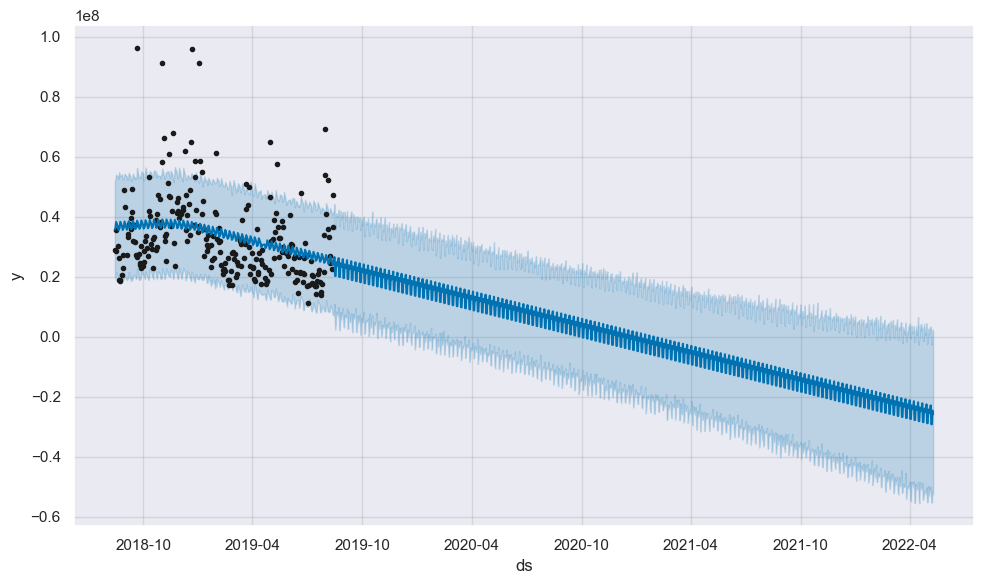

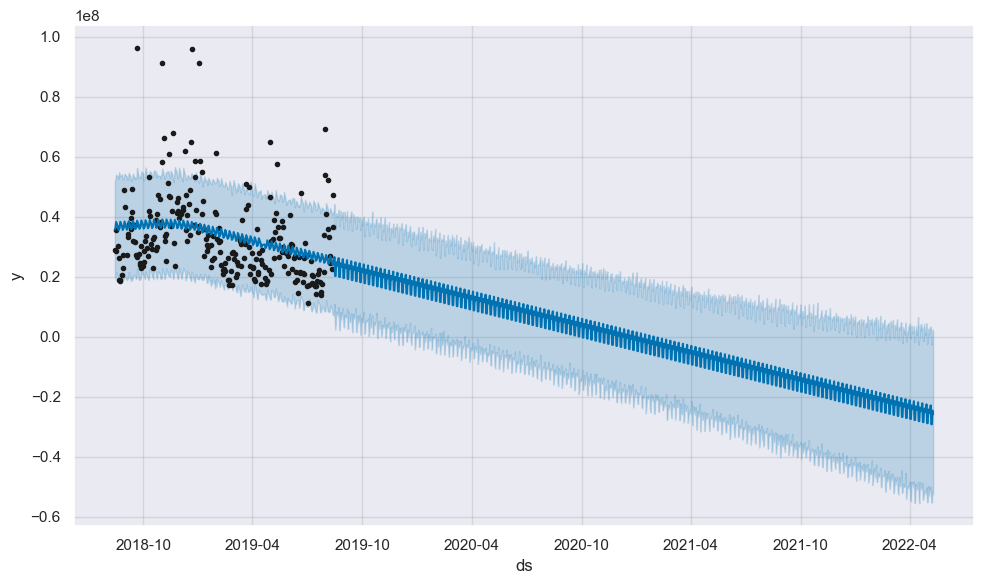

In [67]:
model.plot(predict)

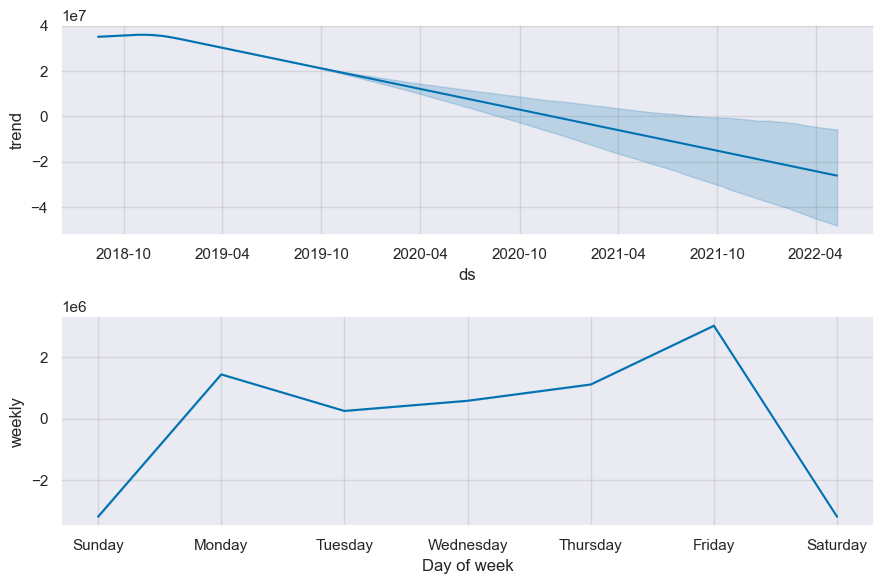

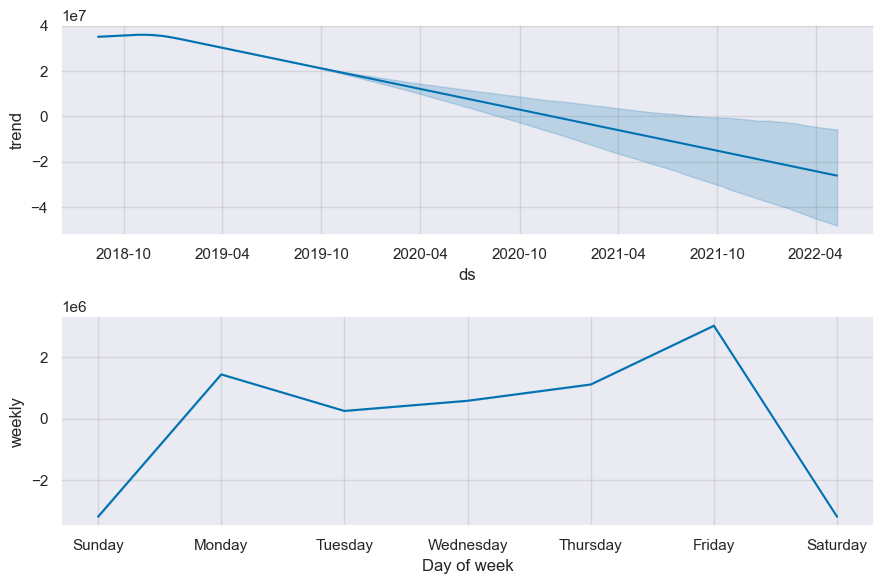

In [68]:
model.plot_components(predict)

In [69]:
## Real World Dataset 
## Apple

In [72]:
new_data = pd.read_csv('AAPL.csv')

In [73]:
new_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400
...,...,...,...,...,...,...,...
9904,2020-03-26,246.520004,258.679993,246.360001,258.440002,258.440002,63021800
9905,2020-03-27,252.750000,255.869995,247.050003,247.740005,247.740005,51054200
9906,2020-03-30,250.740005,255.520004,249.399994,254.809998,254.809998,41994100
9907,2020-03-31,255.600006,262.489990,252.000000,254.289993,254.289993,49250500


In [74]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9909 entries, 0 to 9908
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9909 non-null   object 
 1   Open       9909 non-null   float64
 2   High       9909 non-null   float64
 3   Low        9909 non-null   float64
 4   Close      9909 non-null   float64
 5   Adj Close  9909 non-null   float64
 6   Volume     9909 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 542.0+ KB


In [75]:
new_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [76]:
new_data['Date'] = pd.to_datetime(new_data['Date'])

In [77]:
new_data = new_data[['Date', 'Open']]

In [78]:
new_data.columns=['ds', 'y']

In [79]:
new_data

,ds,y
0,1980-12-12,0.513393
1,1980-12-15,0.488839
2,1980-12-16,0.453125
3,1980-12-17,0.462054
4,1980-12-18,0.475446
...,...,...
9904,2020-03-26,246.520004
9905,2020-03-27,252.750000
9906,2020-03-30,250.740005
9907,2020-03-31,255.600006


In [80]:
model = Prophet()

In [81]:
model.fit(new_data)

21:48:50 - cmdstanpy - INFO - Chain [1] start processing
21:48:52 - cmdstanpy - INFO - Chain [1] done processing


In [82]:
future_dates = model.make_future_dataframe(periods=100)
future_dates

,ds
0,1980-12-12
1,1980-12-15
2,1980-12-16
3,1980-12-17
4,1980-12-18
...,...
10004,2020-07-06
10005,2020-07-07
10006,2020-07-08
10007,2020-07-09


In [83]:
predictions = model.predict(future_dates)
predictions

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1980-12-12,0.252151,-14.519750,15.592983,0.252151,0.252151,0.214470,0.214470,0.214470,-0.028917,-0.028917,-0.028917,0.243387,0.243387,0.243387,0.0,0.0,0.0,0.466622
1,1980-12-15,0.253256,-14.561797,16.173152,0.253256,0.253256,-0.034383,-0.034383,-0.034383,-0.129141,-0.129141,-0.129141,0.094758,0.094758,0.094758,0.0,0.0,0.0,0.218873
2,1980-12-16,0.253624,-14.856202,15.417403,0.253624,0.253624,0.016229,0.016229,0.016229,-0.030085,-0.030085,-0.030085,0.046314,0.046314,0.046314,0.0,0.0,0.0,0.269853
3,1980-12-17,0.253992,-15.292688,14.351256,0.253992,0.253992,-0.076890,-0.076890,-0.076890,-0.076930,-0.076930,-0.076930,0.000040,0.000040,0.000040,0.0,0.0,0.0,0.177103
4,1980-12-18,0.254361,-14.592689,14.907582,0.254361,0.254361,-0.039135,-0.039135,-0.039135,0.003992,0.003992,0.003992,-0.043127,-0.043127,-0.043127,0.0,0.0,0.0,0.215225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10004,2020-07-06,226.184912,209.325961,239.879936,226.184912,226.184912,-1.277362,-1.277362,-1.277362,-0.129141,-0.129141,-0.129141,-1.148221,-1.148221,-1.148221,0.0,0.0,0.0,224.907550
10005,2020-07-07,226.243680,208.790279,240.054160,226.243680,226.243680,-1.129686,-1.129686,-1.129686,-0.030085,-0.030085,-0.030085,-1.099601,-1.099601,-1.099601,0.0,0.0,0.0,225.113995
10006,2020-07-08,226.302449,210.242832,240.867832,226.302449,226.302449,-1.124724,-1.124724,-1.124724,-0.076930,-0.076930,-0.076930,-1.047794,-1.047794,-1.047794,0.0,0.0,0.0,225.177724
10007,2020-07-09,226.361217,209.474676,241.449284,226.361217,226.361217,-0.989733,-0.989733,-0.989733,0.003992,0.003992,0.003992,-0.993725,-0.993725,-0.993725,0.0,0.0,0.0,225.371484


In [84]:
predict.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [85]:
df_var = predictions[['ds','yhat_lower','yhat_upper','yhat']]

In [86]:
df_var

,ds,yhat_lower,yhat_upper,yhat
0,1980-12-12,-14.519750,15.592983,0.466622
1,1980-12-15,-14.561797,16.173152,0.218873
2,1980-12-16,-14.856202,15.417403,0.269853
3,1980-12-17,-15.292688,14.351256,0.177103
4,1980-12-18,-14.592689,14.907582,0.215225
...,...,...,...,...
10004,2020-07-06,209.325961,239.879936,224.907550
10005,2020-07-07,208.790279,240.054160,225.113995
10006,2020-07-08,210.242832,240.867832,225.177724
10007,2020-07-09,209.474676,241.449284,225.371484


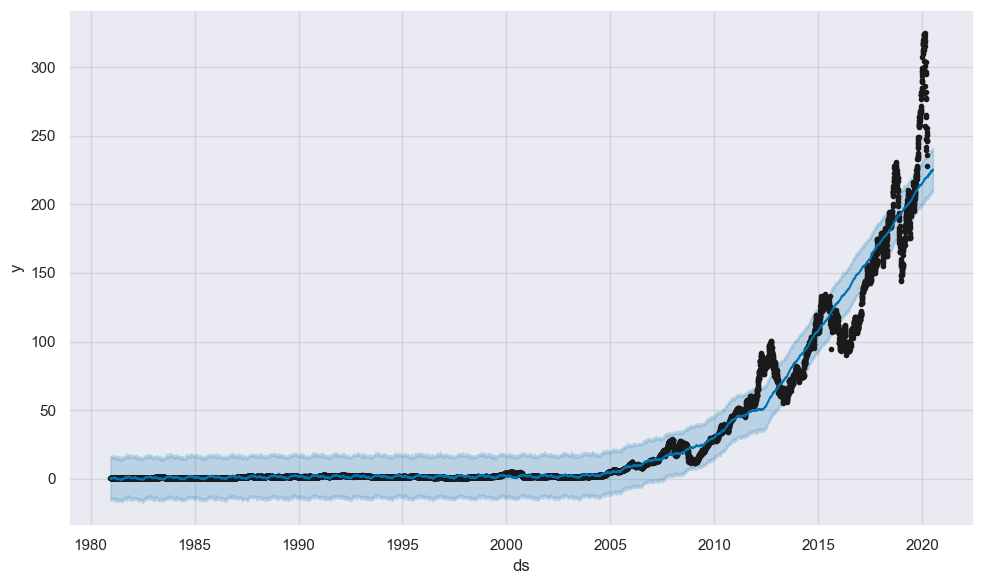

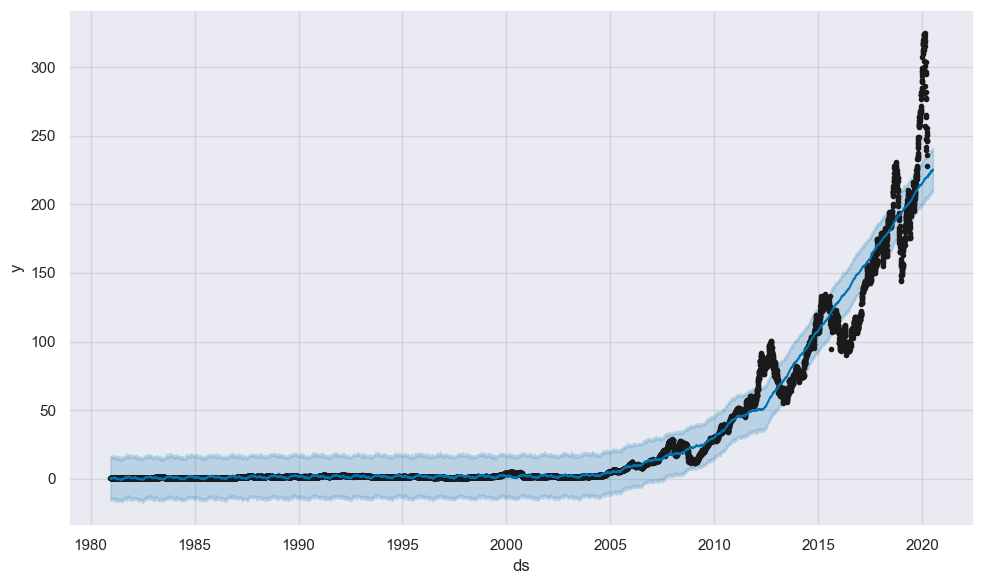

In [87]:
model.plot(predictions)

In [88]:
from prophet.diagnostics import performance_metrics, cross_validation

In [89]:
df_cv = cross_validation(model, initial='720 days', period='50 days', horizon='200 days')

  0%|          | 0/269 [00:00<?, ?it/s]

22:19:38 - cmdstanpy - INFO - Chain [1] start processing
22:19:38 - cmdstanpy - INFO - Chain [1] done processing
22:19:38 - cmdstanpy - INFO - Chain [1] start processing
22:19:38 - cmdstanpy - INFO - Chain [1] done processing
22:19:38 - cmdstanpy - INFO - Chain [1] start processing
22:19:38 - cmdstanpy - INFO - Chain [1] done processing
22:19:38 - cmdstanpy - INFO - Chain [1] start processing
22:19:38 - cmdstanpy - INFO - Chain [1] done processing
22:19:39 - cmdstanpy - INFO - Chain [1] start processing
22:19:39 - cmdstanpy - INFO - Chain [1] done processing
22:19:39 - cmdstanpy - INFO - Chain [1] start processing
22:19:39 - cmdstanpy - INFO - Chain [1] done processing
22:19:39 - cmdstanpy - INFO - Chain [1] start processing
22:19:39 - cmdstanpy - INFO - Chain [1] done processing
22:19:39 - cmdstanpy - INFO - Chain [1] start processing
22:19:40 - cmdstanpy - INFO - Chain [1] done processing
22:19:40 - cmdstanpy - INFO - Chain [1] start processing
22:19:40 - cmdstanpy - INFO - Chain [1]

22:20:16 - cmdstanpy - INFO - Chain [1] done processing
22:20:16 - cmdstanpy - INFO - Chain [1] start processing
22:20:17 - cmdstanpy - INFO - Chain [1] done processing
22:20:17 - cmdstanpy - INFO - Chain [1] start processing
22:20:17 - cmdstanpy - INFO - Chain [1] done processing
22:20:18 - cmdstanpy - INFO - Chain [1] start processing
22:20:18 - cmdstanpy - INFO - Chain [1] done processing
22:20:18 - cmdstanpy - INFO - Chain [1] start processing
22:20:19 - cmdstanpy - INFO - Chain [1] done processing
22:20:19 - cmdstanpy - INFO - Chain [1] start processing
22:20:20 - cmdstanpy - INFO - Chain [1] done processing
22:20:20 - cmdstanpy - INFO - Chain [1] start processing
22:20:20 - cmdstanpy - INFO - Chain [1] done processing
22:20:20 - cmdstanpy - INFO - Chain [1] start processing
22:20:21 - cmdstanpy - INFO - Chain [1] done processing
22:20:21 - cmdstanpy - INFO - Chain [1] start processing
22:20:22 - cmdstanpy - INFO - Chain [1] done processing
22:20:22 - cmdstanpy - INFO - Chain [1] 

22:21:32 - cmdstanpy - INFO - Chain [1] done processing
22:21:33 - cmdstanpy - INFO - Chain [1] start processing
22:21:34 - cmdstanpy - INFO - Chain [1] done processing
22:21:34 - cmdstanpy - INFO - Chain [1] start processing
22:21:35 - cmdstanpy - INFO - Chain [1] done processing
22:21:35 - cmdstanpy - INFO - Chain [1] start processing
22:21:36 - cmdstanpy - INFO - Chain [1] done processing
22:21:36 - cmdstanpy - INFO - Chain [1] start processing
22:21:37 - cmdstanpy - INFO - Chain [1] done processing
22:21:38 - cmdstanpy - INFO - Chain [1] start processing
22:21:38 - cmdstanpy - INFO - Chain [1] done processing
22:21:39 - cmdstanpy - INFO - Chain [1] start processing
22:21:40 - cmdstanpy - INFO - Chain [1] done processing
22:21:40 - cmdstanpy - INFO - Chain [1] start processing
22:21:41 - cmdstanpy - INFO - Chain [1] done processing
22:21:42 - cmdstanpy - INFO - Chain [1] start processing
22:21:43 - cmdstanpy - INFO - Chain [1] done processing
22:21:43 - cmdstanpy - INFO - Chain [1] 

22:23:38 - cmdstanpy - INFO - Chain [1] done processing
22:23:39 - cmdstanpy - INFO - Chain [1] start processing
22:23:40 - cmdstanpy - INFO - Chain [1] done processing
22:23:41 - cmdstanpy - INFO - Chain [1] start processing
22:23:44 - cmdstanpy - INFO - Chain [1] done processing
22:23:44 - cmdstanpy - INFO - Chain [1] start processing
22:23:47 - cmdstanpy - INFO - Chain [1] done processing
22:23:47 - cmdstanpy - INFO - Chain [1] start processing
22:23:49 - cmdstanpy - INFO - Chain [1] done processing
22:23:49 - cmdstanpy - INFO - Chain [1] start processing
22:23:50 - cmdstanpy - INFO - Chain [1] done processing
22:23:51 - cmdstanpy - INFO - Chain [1] start processing
22:23:52 - cmdstanpy - INFO - Chain [1] done processing
22:23:53 - cmdstanpy - INFO - Chain [1] start processing
22:23:55 - cmdstanpy - INFO - Chain [1] done processing
22:23:55 - cmdstanpy - INFO - Chain [1] start processing
22:23:56 - cmdstanpy - INFO - Chain [1] done processing
22:23:57 - cmdstanpy - INFO - Chain [1] 

In [90]:
df_p = performance_metrics(df_cv)

In [91]:
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,20 days,100.337437,10.016858,5.068633,0.282651,0.202325,0.279884,0.258002
1,21 days,101.244152,10.062015,5.093348,0.284397,0.204539,0.281611,0.256800
2,22 days,100.783588,10.039103,5.107693,0.286216,0.207485,0.283355,0.252316
3,23 days,101.312153,10.065394,5.138480,0.287363,0.209701,0.284584,0.248784
4,24 days,100.913791,10.045586,5.140527,0.288202,0.209293,0.285398,0.248855
...,...,...,...,...,...,...,...,...
176,196 days,237.045067,15.396268,7.170234,0.443940,0.319798,0.444896,0.187473
177,197 days,238.404247,15.440345,7.179105,0.444095,0.319624,0.445103,0.186988
178,198 days,238.572850,15.445804,7.182358,0.444973,0.319817,0.445814,0.186554
179,199 days,237.506675,15.411252,7.173283,0.444963,0.319304,0.445333,0.188642
